In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
df = pd.read_csv("/kaggle/input/datasets/robinsp999/objects/ObesityDataSet_raw_and_data_sinthetic.csv")

df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [8]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [10]:
object_columns = df.select_dtypes(include=['object']).columns
for i in object_columns:
    print(df.value_counts(i))
    print("-------------------------------")

Gender
Male      1068
Female    1043
Name: count, dtype: int64
-------------------------------
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
-------------------------------
FAVC
yes    1866
no      245
Name: count, dtype: int64
-------------------------------
SCC
no     2015
yes      96
Name: count, dtype: int64
-------------------------------
SMOKE
no     2067
yes      44
Name: count, dtype: int64
-------------------------------
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
-------------------------------
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
-------------------------------
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
-------------------------------
NObeyesdad
Obesity_Type_I         351


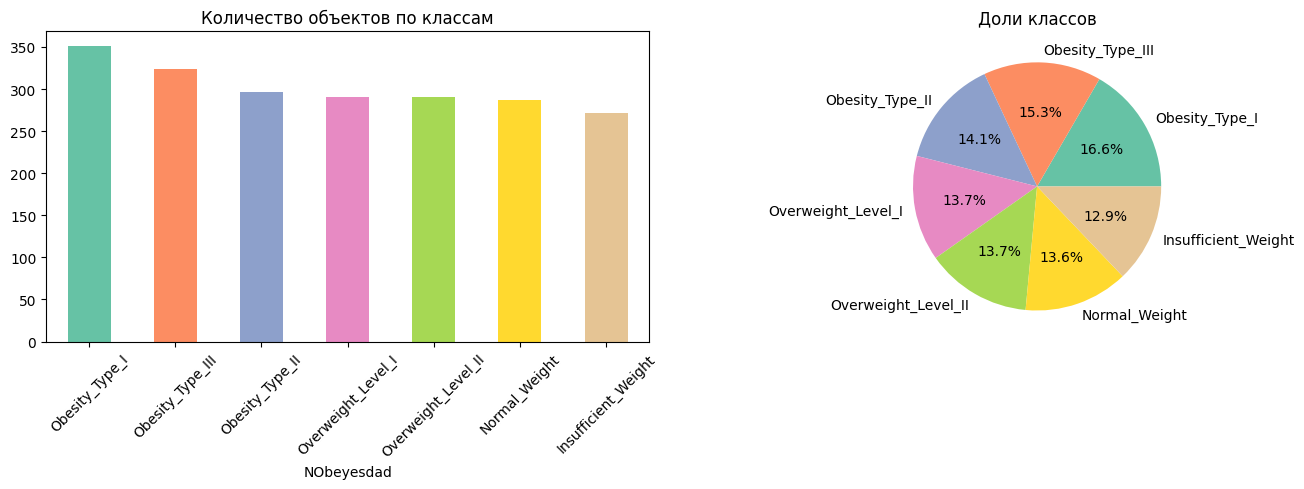

In [11]:
target_col = 'NObeyesdad'
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df[target_col].value_counts().plot.bar(ax=axes[0], color=sns.color_palette('Set2'))
axes[0].set_title('Количество объектов по классам')
axes[0].tick_params(axis='x', rotation=45)

df[target_col].value_counts(normalize=True).plot.pie(ax=axes[1], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axes[1].set_ylabel('')
axes[1].set_title('Доли классов')
plt.tight_layout()
plt.show()

**Гипотеза 1: CALC Always не на что не влияет, потому что он всего лишь 1 в своей выборке**

**Гипотиза 2: При объедения Автомоболий и Общественного транспорта в 1 критерий ничего не поменяется**

**Гипотеза 3: Мы удаляем колонки MTRANS_Motorbike MTRANS_Bike и у нас не сильно упадет точность модели**

**Гипотеза 4: Нам  нужно только рост и вес! Все остальное нам вообще не нужно**

**Гипотеза 5: Многоклассоваяя классфикация будет работать лучше Рандомного леса и Дерево решений**


In [12]:
for col in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']:
    df[col] = df[col].map({'no': 0, 'yes': 1})


In [13]:
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,no,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,Sometimes,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,Frequently,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,Frequently,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,Sometimes,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,Sometimes,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,Sometimes,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,Sometimes,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,Sometimes,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
df["CALC"] = df["CALC"].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df["CAEC"] = df["CAEC"].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,1,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,1,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [15]:

# df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 'Common','Automobile': 'Common'})


df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS')
new_cols = [col for col in df.columns if col.startswith('MTRANS_')]
df[new_cols] = df[new_cols].astype(int)


df = df.drop(["MTRANS_Motorbike", "MTRANS_Bike"],axis=1)
df



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,1,Normal_Weight,0,1,0
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Normal_Weight,0,1,0
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,1,Normal_Weight,0,1,0
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,Overweight_Level_I,0,0,1
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,Overweight_Level_II,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,1,Obesity_Type_III,0,1,0
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,1,Obesity_Type_III,0,1,0
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,1,Obesity_Type_III,0,1,0
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,1,Obesity_Type_III,0,1,0


In [16]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'NObeyesdad', 'MTRANS_Automobile',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

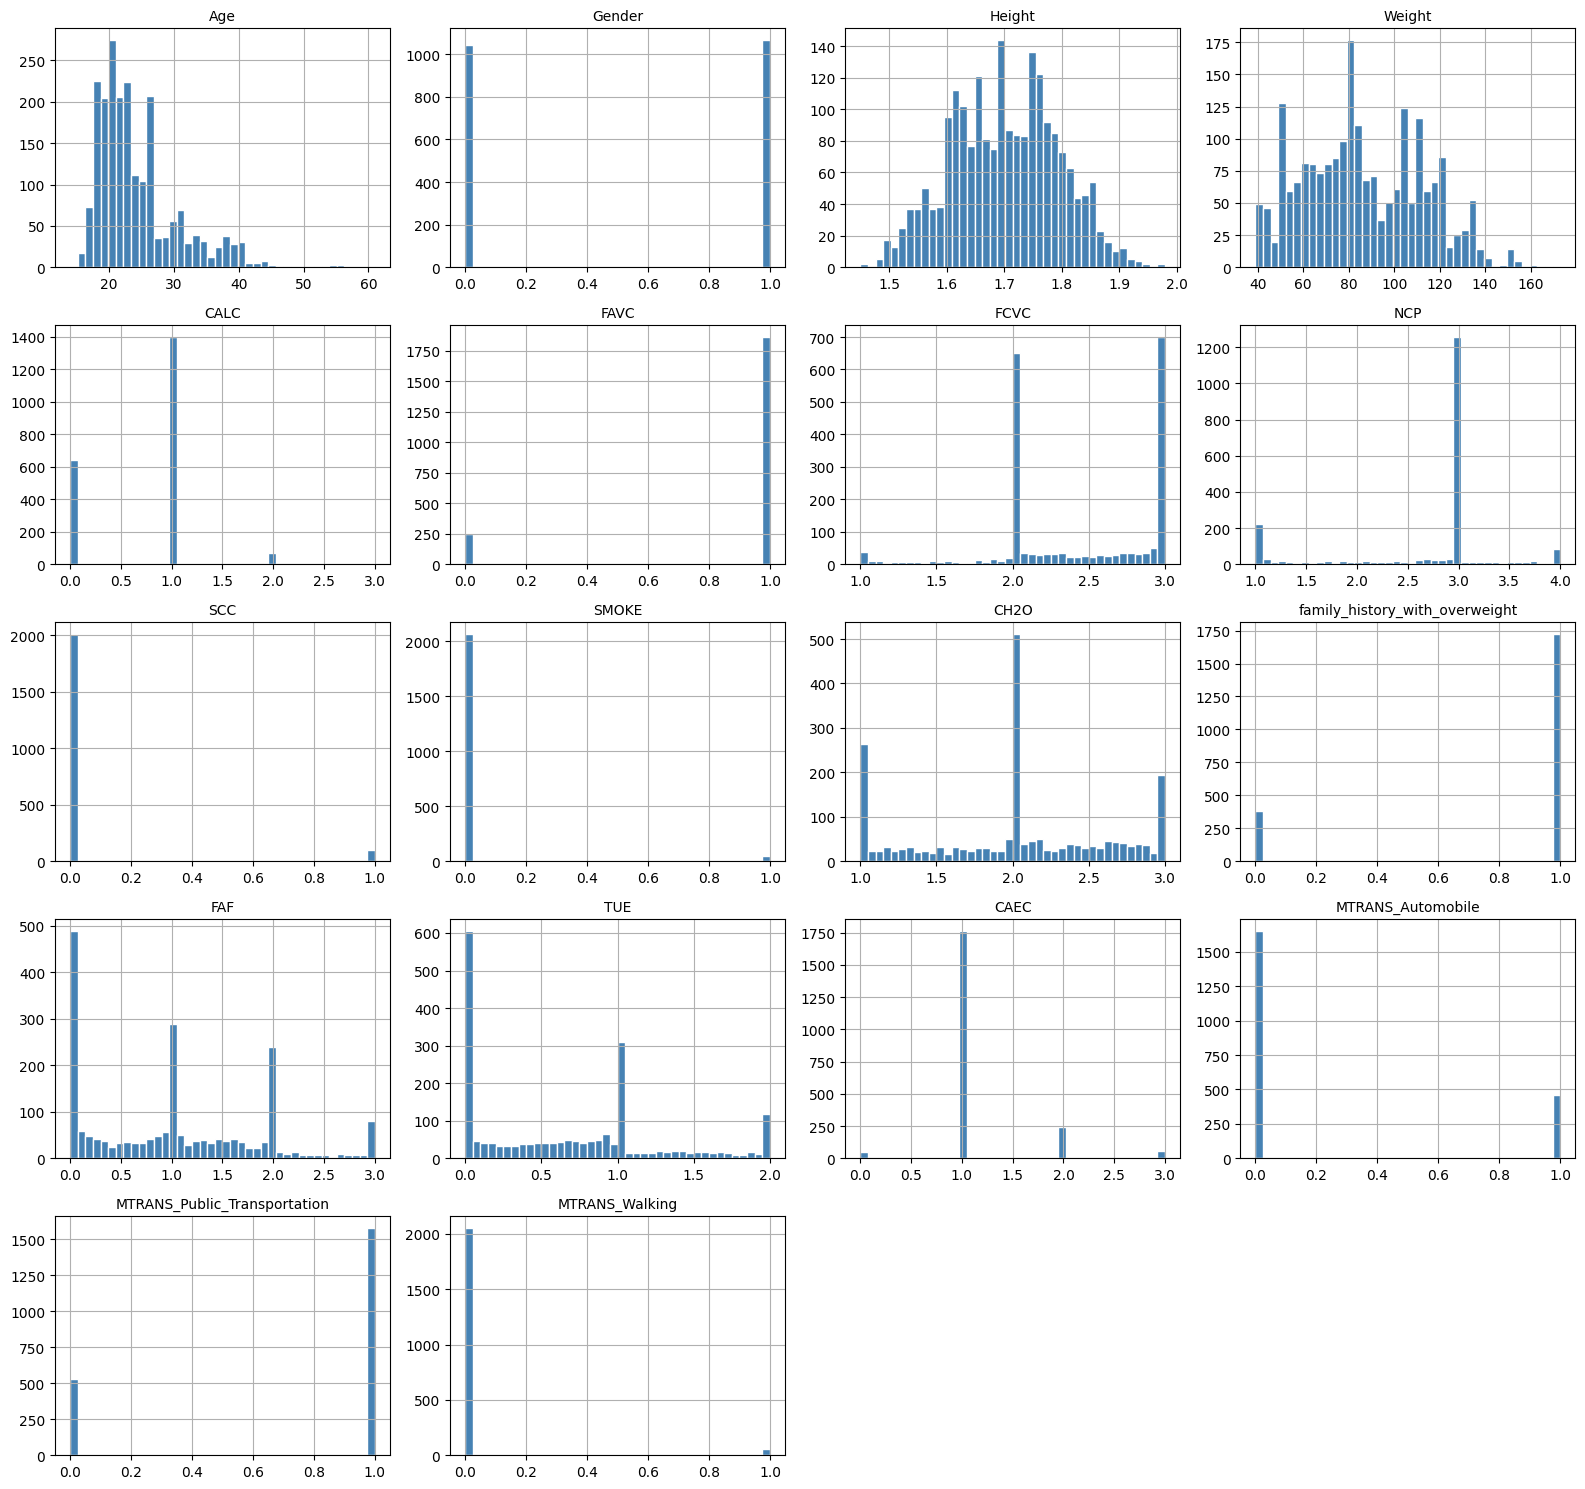

In [17]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

n_cols = len(numeric_cols)
n_rows = (n_cols + 3) // 4
fig, axes = plt.subplots(n_rows, 4, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(bins=40, ax=axes[i], color='steelblue', edgecolor='white')
    axes[i].set_title(col, fontsize=10)

for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

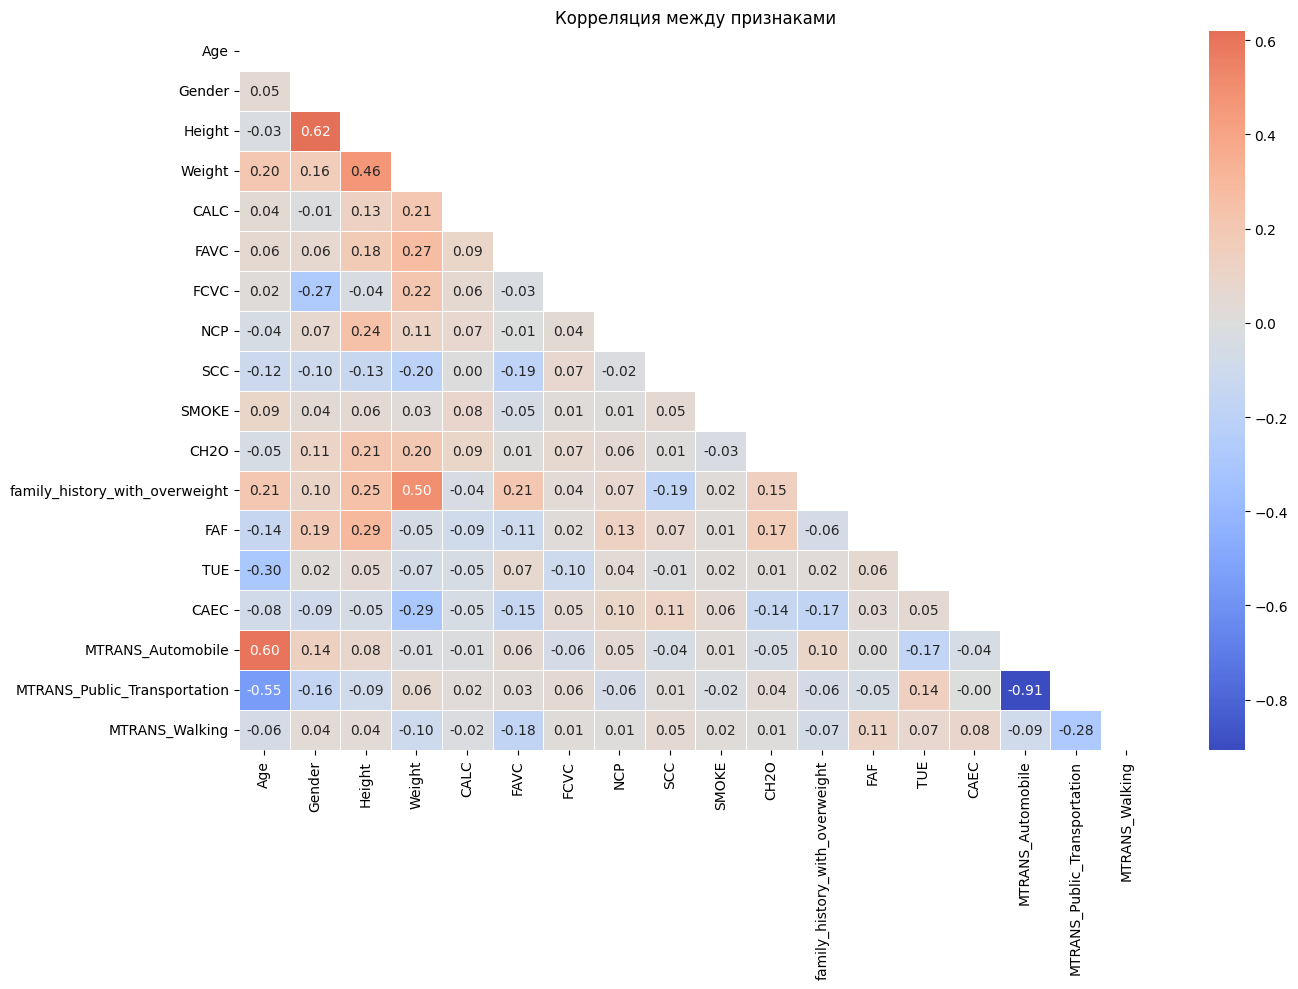

In [18]:
plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Корреляция между признаками')
plt.tight_layout()
plt.show()

In [19]:
num = df[df["CALC"]==3].index
df = df.drop(num, axis=0)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, log_loss,
                             roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
                             ConfusionMatrixDisplay)

In [21]:
y_class = df["NObeyesdad"]
# X_class = df[["Weight","Height"]]
X_class = df.drop(["NObeyesdad"], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [22]:



log_reg_mn = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

y_pred_mn = log_reg_mn.predict(X_test)
y_proba =  log_reg_mn.predict_proba(X_test)
pd.DataFrame({
    'Softmax Accuracy': [accuracy_score(y_test, y_pred_mn)],
    'Softmax F1 (macro)': [f1_score(y_test, y_pred_mn, average='macro')],
}, index=['LogReg']).round(4)

#LogReg	0.8649	0.8576  без Always

#LogReg	0.8629	0.8571  С Always

# LogReg	0.8649	0.8572  без Always и с объединением по гипотезе 2 можно сичтать её успешной

# LogReg	0.8649	0.8577 гипотеза 3 не подтвердилась, модель стала даже лучше

# LogReg	0.9028	0.9016  гипотеза 4 подтвердилась, и модель стала предсказывать лучше



,Softmax Accuracy,Softmax F1 (macro)
LogReg,0.8649,0.8577


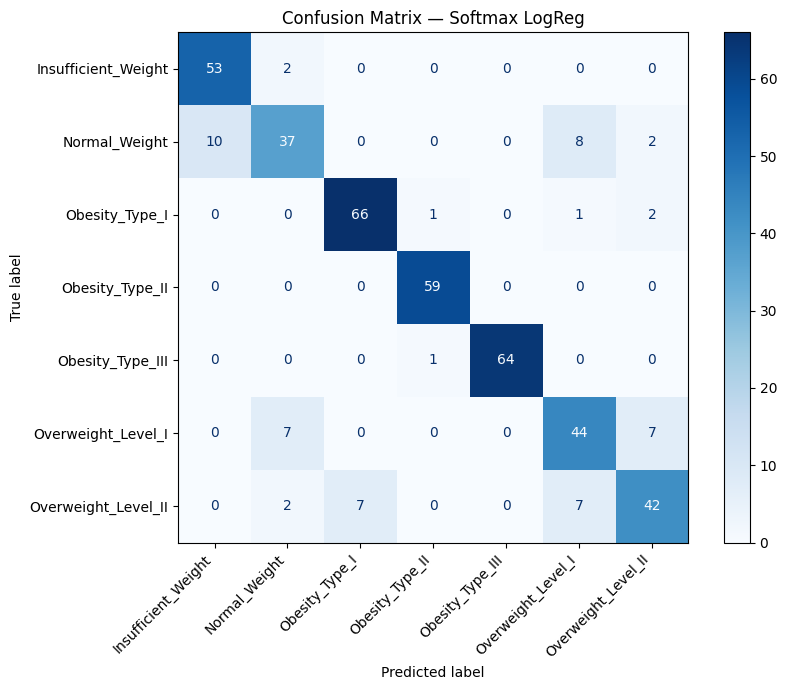

In [23]:
class_names = log_reg_mn.classes_


fig, ax = plt.subplots(figsize=(9, 7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mn, display_labels=class_names, ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix — Softmax LogReg')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_cls = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
dt_cls.fit(X_train, y_train)

y_train_pred = dt_cls.predict(X_train)
y_test_pred = dt_cls.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

results = pd.DataFrame({
    'Accuracy': [train_acc, test_acc],
    'F1 (macro)': [train_f1, test_f1]
}, index=['Train', 'Test']).round(4)

print(results)

       Accuracy  F1 (macro)
Train    0.9982      0.9981
Test     0.9384      0.9367


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_cls = RandomForestClassifier(max_depth=13, random_state=42, criterion='entropy')
dt_cls.fit(X_train, y_train)

y_train_pred = dt_cls.predict(X_train)
y_test_pred = dt_cls.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

results = pd.DataFrame({
    'Accuracy': [train_acc, test_acc],
    'F1 (macro)': [train_f1, test_f1]
}, index=['Train', 'Test']).round(4)

print(results)

 # Рандомно едерево самое лучшие в плане решений

       Accuracy  F1 (macro)
Train    1.0000      1.0000
Test     0.9597      0.9593


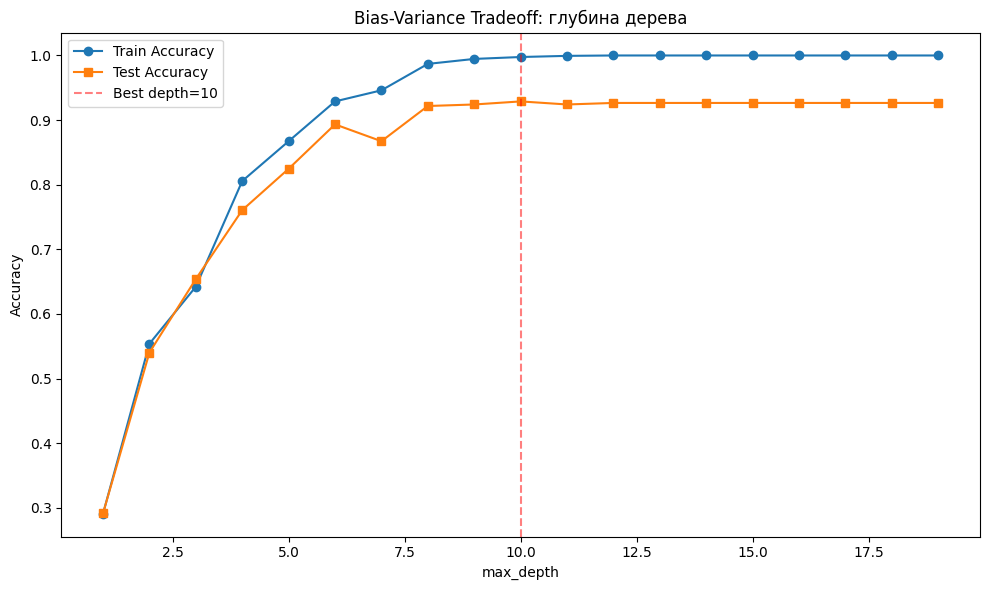

In [26]:
depths = range(1, 20)
train_acc, test_acc = [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42).fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test))) 

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(depths, train_acc, 'o-', label='Train Accuracy')
ax.plot(depths, test_acc, 's-', label='Test Accuracy')
ax.axvline(x=depths[np.argmax(test_acc)], color='red', linestyle='--', alpha=0.5,
           label=f'Best depth={depths[np.argmax(test_acc)]}')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Bias-Variance Tradeoff: глубина дерева')
ax.legend()
plt.tight_layout()
plt.show()

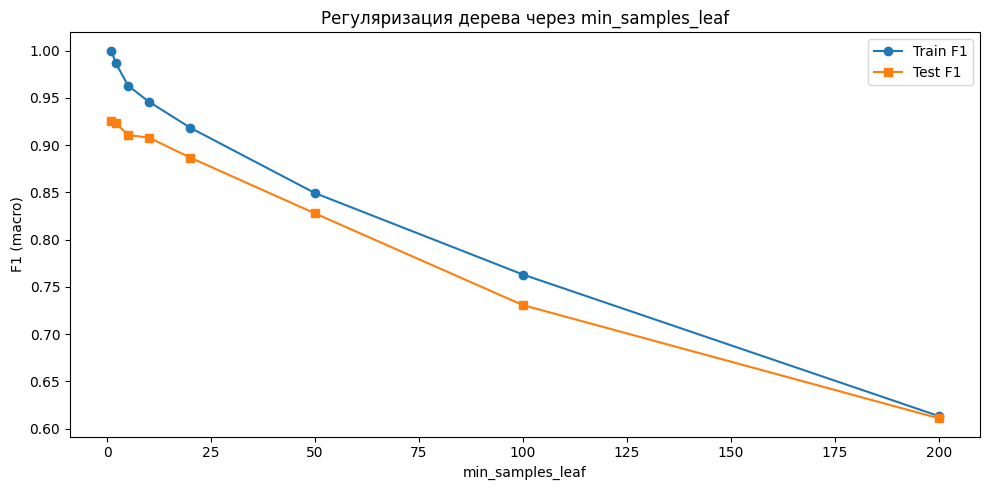

In [27]:
leafs = [1, 2, 5, 10, 20, 50, 100, 200]
train_f1, test_f1 = [], []

for ml in leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=ml, random_state=42).fit(X_train, y_train)
    train_f1.append(f1_score(y_train, dt.predict(X_train), average='macro'))
    test_f1.append(f1_score(y_test, dt.predict(X_test), average='macro'))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(leafs, train_f1, 'o-', label='Train F1')
ax.plot(leafs, test_f1, 's-', label='Test F1')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('F1 (macro)')
ax.set_title('Регуляризация дерева через min_samples_leaf')
ax.legend()
plt.tight_layout()
plt.show()

In [28]:
results_crit = []
for crit in ['gini', 'entropy']:
    for d in range(1,11):
        dt = DecisionTreeClassifier(criterion=crit, max_depth=d, random_state=42).fit(X_train, y_train)
        results_crit.append({
            'criterion': crit,
            'max_depth': d,
            'train_acc': accuracy_score(y_train, dt.predict(X_train)),
            'test_acc': accuracy_score(y_test, dt.predict(X_test)),
        })
pd.DataFrame(results_crit).round(4)

,criterion,max_depth,train_acc,test_acc
0,gini,1,0.2909,0.2915
1,gini,2,0.5539,0.5403
2,gini,3,0.6422,0.6540
3,gini,4,0.8057,0.7607
4,gini,5,0.8673,0.8246
5,gini,6,0.9289,0.8934
6,gini,7,0.9461,0.8673
7,gini,8,0.9870,0.9218
8,gini,9,0.9947,0.9242
9,gini,10,0.9976,0.9289


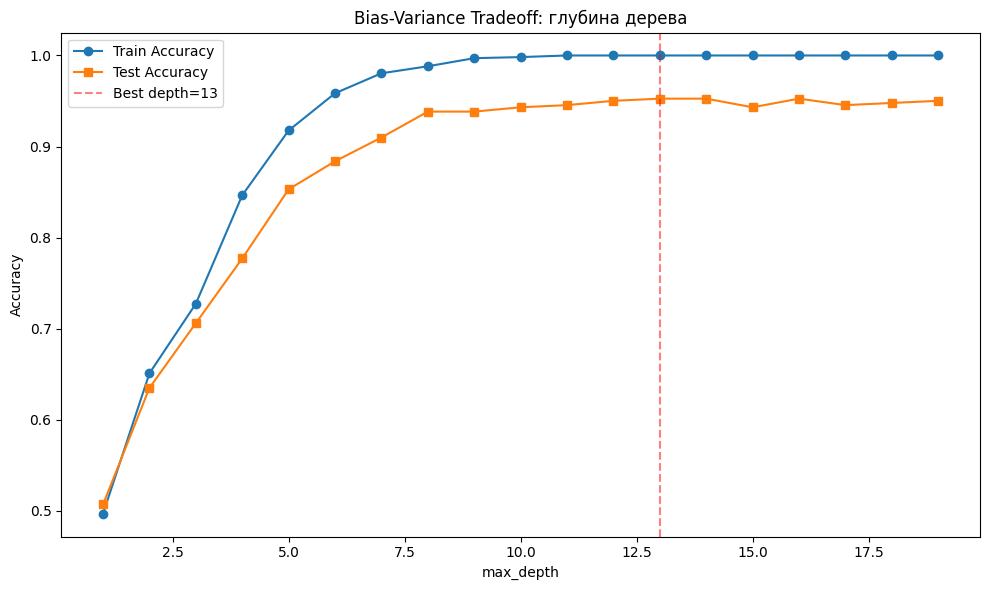

In [29]:
depths = range(1, 20)
train_acc, test_acc = [], []

for d in depths:
    dt = RandomForestClassifier(max_depth=d, random_state=42).fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test))) 

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(depths, train_acc, 'o-', label='Train Accuracy')
ax.plot(depths, test_acc, 's-', label='Test Accuracy')
ax.axvline(x=depths[np.argmax(test_acc)], color='red', linestyle='--', alpha=0.5,
           label=f'Best depth={depths[np.argmax(test_acc)]}')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Bias-Variance Tradeoff: глубина дерева')
ax.legend()
plt.tight_layout()
plt.show()

In [30]:
results_crit = []
for crit in ['gini', 'entropy']:
    for d in range(1,11):
        dt = DecisionTreeClassifier(criterion=crit, max_depth=d, random_state=42).fit(X_train, y_train)
        results_crit.append({
            'criterion': crit,
            'max_depth': d,
            'train_acc': accuracy_score(y_train, dt.predict(X_train)),
            'test_acc': accuracy_score(y_test, dt.predict(X_test)),
        })
pd.DataFrame(results_crit).round(4)

,criterion,max_depth,train_acc,test_acc
0,gini,1,0.2909,0.2915
1,gini,2,0.5539,0.5403
2,gini,3,0.6422,0.6540
3,gini,4,0.8057,0.7607
4,gini,5,0.8673,0.8246
5,gini,6,0.9289,0.8934
6,gini,7,0.9461,0.8673
7,gini,8,0.9870,0.9218
8,gini,9,0.9947,0.9242
9,gini,10,0.9976,0.9289


In [31]:
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dist = {
    'max_depth': [10],
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'criterion': ['gini', 'entropy'],
}

rand_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dist, n_iter=100, cv=cv, scoring='f1_macro', random_state=42, n_jobs=-1
)
rand_search.fit(X_train, y_train)

rand_search.best_params_, rand_search.best_score_.round(4)


# ({'criterion': 'entropy',
#   'max_depth': 8,
#   'min_samples_leaf': 2,
#   'min_samples_split': 4},
#  np.float64(0.938))


# При БД только для Weight Height

# ({'criterion': 'entropy',
#   'max_depth': 10,
#   'min_samples_leaf': 2,
#   'min_samples_split': 7},
#  np.float64(0.9441))

({'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 7},
 np.float64(0.935))

In [32]:
param_dist = {
    'max_depth': [8],
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'criterion': ['gini', 'entropy'],
}

rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist, n_iter=100, cv=cv, scoring='f1_macro', random_state=42, n_jobs=-1
)
rand_search.fit(X_train, y_train)

rand_search.best_params_, rand_search.best_score_.round(4)

# ({'criterion': 'gini',
#   'max_depth': 18,
#   'min_samples_leaf': 2,
#   'min_samples_split': 3},
#  np.float64(0.9491))


# При БД только для Weight Height


# ({'criterion': 'entropy',
#   'max_depth': 8,
#   'min_samples_leaf': 2,
#   'min_samples_split': 7},
#  np.float64(0.9531))

({'criterion': 'entropy',
  'max_depth': 8,
  'min_samples_leaf': 2,
  'min_samples_split': 7},
 np.float64(0.9303))

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    'LogReg': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForestClassifier':RandomForestClassifier(max_depth=13, random_state=42, criterion='entropy'),
    'DecisionTree':DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
}

cv_results = []
for name, model in models_cv.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro')
    cv_results.append({'Model': name, 'CV F1 mean': scores.mean(), 'CV F1 std': scores.std()})

pd.DataFrame(cv_results).set_index('Model').round(4)

,CV F1 mean,CV F1 std
Model,,
LogReg,0.8717,0.0308
RandomForestClassifier,0.9519,0.0112
DecisionTree,0.9465,0.0057


**Гипотеза 1: CALC Always не на что не влияет, потому что он всего лишь 1 в своей выборке**

**Гипотиза 2: При объедения Автомоболий и Общественного транспорта в 1 критерий ничего не поменяется**

**Гипотеза 3: Мы удаляем колонки MTRANS_Motorbike MTRANS_Bike и у нас не сильно упадет точность модели**

**Гипотеза 4: Нам  нужно только рост и вес! Все остальное нам вообще не нужно**

**Гипотеза 5: Многоклассоваяя классфикация будет работать лучше Рандомного леса и Дерево решений**


Объяснение гипотез, почему так:

1) Буквально 1 параметр, даже если бы он был очень полезным, его 1-го просто недостаточно, чтобы модель обучилась его использовать, так что когда он встречается она пытается его учесть и зря тратит ресурсы. Так что его удаление балгоприятно

2) Автомобиль и Общественный транспорт это одна и та же категория (двигаться не своими ногами) Так что мы упрощаем работу модели для предсказания, и как оказалось нет различия что это машина или автобус, или просто транспорт.

3) Та же логика что и у Гипотезы 1, слишком мало данных, так что их удаление не приведет к потере качества модели

4) Поскольку индекс Ожирения рассчитывается из роста и веса, то для задачи получения этого самого индекса нам и нужны только рост и вес. И на примере логистической регрессии показатели увеличились, то говорит о главенстве этих параметров в предсказывании индека ожирения

5) Эта гипотеза не оправдалась поскольку если рассматривать случай со всеми данными, то зависимость между классами оказалась труднее и решающие деревья гораздо нлучше справляются с этим типом зависимостей, нежели просто разделение по росту и весу, с чем логистическая регрессия хорошо справилась

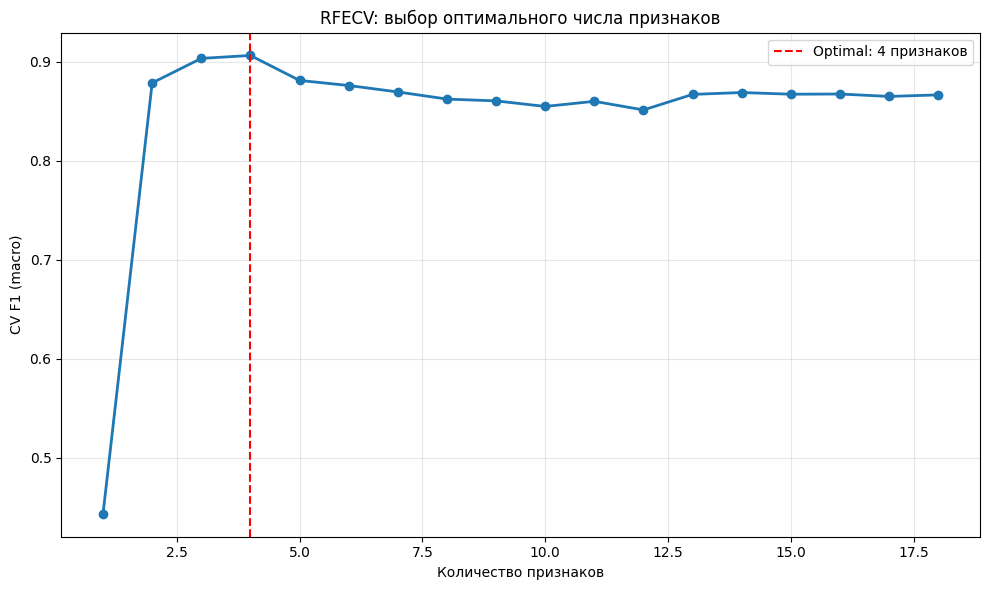

In [34]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression( max_iter=1000, random_state=42),
              step=1, cv=5, scoring='f1_macro', n_jobs=-1)
rfecv.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
        rfecv.cv_results_['mean_test_score'], 'o-', linewidth=2)
ax.axvline(rfecv.n_features_, color='red', linestyle='--', 
           label=f'Optimal: {rfecv.n_features_} признаков')
ax.set_xlabel('Количество признаков')
ax.set_ylabel('CV F1 (macro)')
ax.set_title('RFECV: выбор оптимального числа признаков')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
selected_features_rfecv = X_class.columns[rfecv.support_].tolist()
selected_features_rfecv

['Gender', 'Height', 'Weight', 'FCVC']

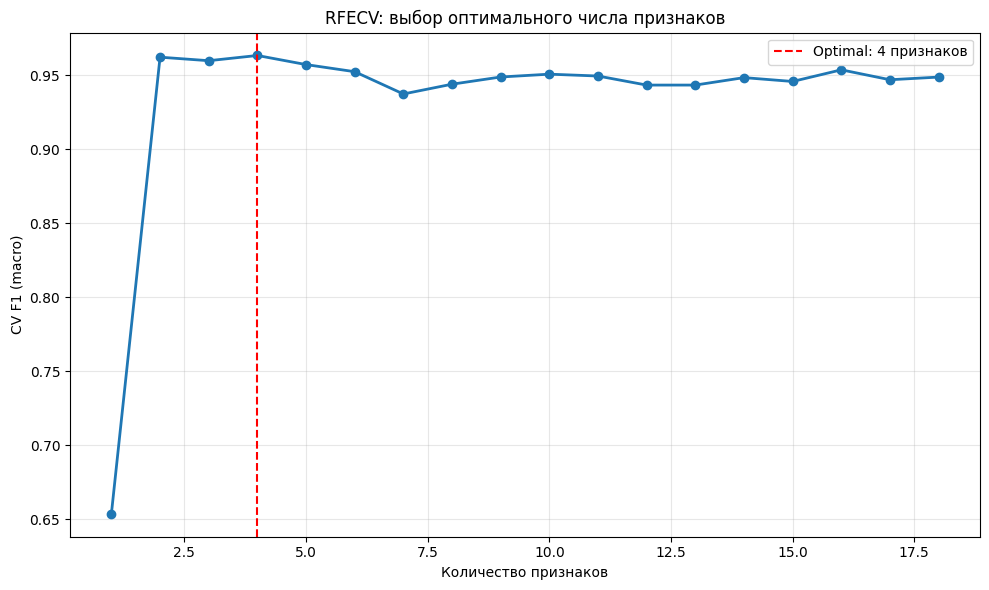

In [36]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=RandomForestClassifier(max_depth=13, random_state=42, criterion='entropy'),
              step=1, cv=5, scoring='f1_macro', n_jobs=-1)
rfecv.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
        rfecv.cv_results_['mean_test_score'], 'o-', linewidth=2)
ax.axvline(rfecv.n_features_, color='red', linestyle='--', 
           label=f'Optimal: {rfecv.n_features_} признаков')
ax.set_xlabel('Количество признаков')
ax.set_ylabel('CV F1 (macro)')
ax.set_title('RFECV: выбор оптимального числа признаков')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
selected_features_rfecv = X_class.columns[rfecv.support_].tolist()
selected_features_rfecv

['Age', 'Height', 'Weight', 'FCVC']

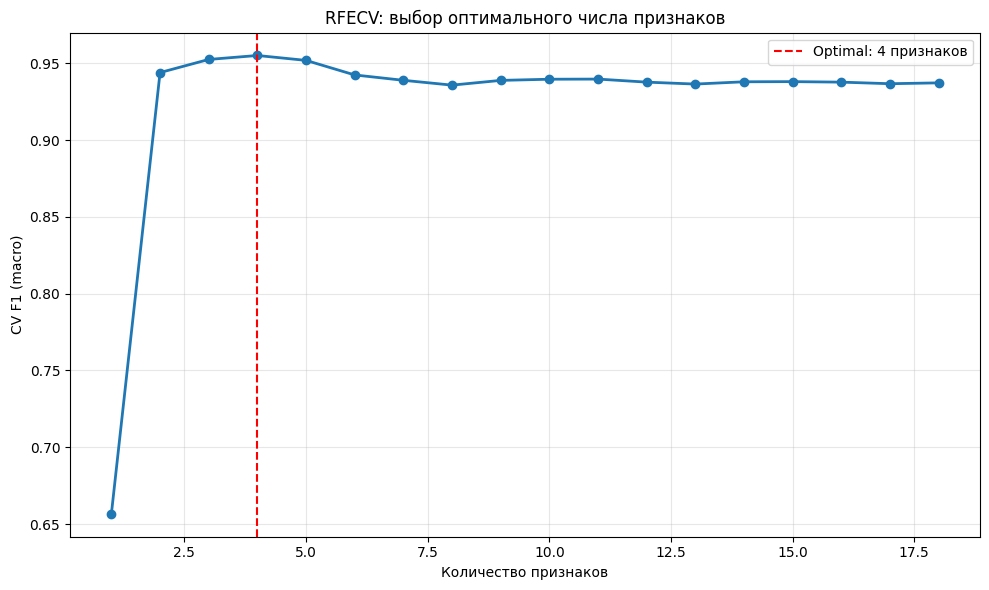

In [38]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy'),
              step=1, cv=5, scoring='f1_macro', n_jobs=-1)
rfecv.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
        rfecv.cv_results_['mean_test_score'], 'o-', linewidth=2)
ax.axvline(rfecv.n_features_, color='red', linestyle='--', 
           label=f'Optimal: {rfecv.n_features_} признаков')
ax.set_xlabel('Количество признаков')
ax.set_ylabel('CV F1 (macro)')
ax.set_title('RFECV: выбор оптимального числа признаков')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
selected_features_rfecv = X_class.columns[rfecv.support_].tolist()
selected_features_rfecv

['Age', 'Gender', 'Height', 'Weight']

РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ

Лучшее значение C: 339.322177

Accuracy на test: 0.9692
F1-macro на test: 0.9685

Классы в scores_: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

--- Топ-10 лучших значений C ---
             C  mean_score  std_score
40    339.3222      0.9588     0.0095
41    494.1713      0.9583     0.0096
39    232.9952      0.9569     0.0104
42    719.6857      0.9563     0.0100
38    159.9859      0.9556     0.0076
43   1048.1131      0.9556     0.0103
44   1526.4180      0.9556     0.0103
49  10000.0000      0.9556     0.0111
45   2222.9965      0.9549     0.0110
46   3237.4575      0.9549     0.0110
47   4714.8664      0.9549     0.0110
48   6866.4885      0.9549     0.0110
37    109.8541      0.9521     0.0099
36     75.4312      0.9515     0.0110
35     51.7947      0.9514     0.0111


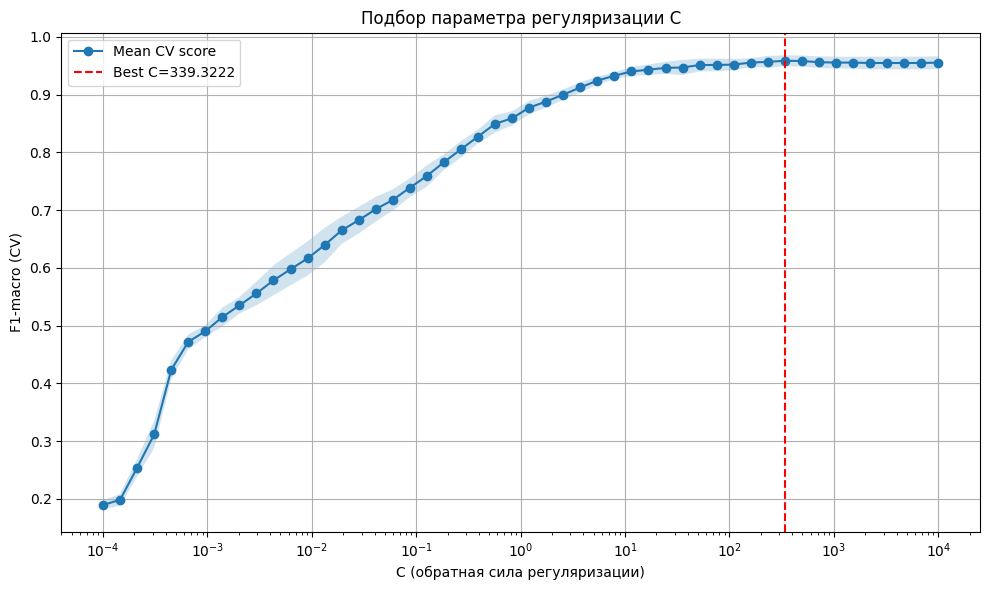

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score

logreg_cv = LogisticRegressionCV(
    Cs=np.logspace(-4, 4, 50),
    penalty='l2',
    solver='lbfgs',
    cv=5,
    scoring='f1_macro',
    max_iter=1000,
    tol=1e-4,
    random_state=42,
    verbose=0
)
logreg_cv.fit(X_train, y_train)

print("=" * 50)
print("РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ")
print("=" * 50)
print(f"\nЛучшее значение C: {logreg_cv.C_[0]:.6f}")

y_pred = logreg_cv.predict(X_test)
print(f"\nAccuracy на test: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-macro на test: {f1_score(y_test, y_pred, average='macro'):.4f}")

if isinstance(logreg_cv.scores_, dict):
    print(f"\nКлассы в scores_: {list(logreg_cv.scores_.keys())}")
    all_scores = []
    for cls, scores in logreg_cv.scores_.items():
        all_scores.append(scores)
    
    scores_array = np.array(all_scores)  
    mean_scores = scores_array.mean(axis=(0, 1))  
    std_scores = scores_array.std(axis=(0, 1))
    
else:
    mean_scores = logreg_cv.scores_.mean(axis=(0, 1))
    std_scores = logreg_cv.scores_.std(axis=(0, 1))

results = pd.DataFrame({
    'C': logreg_cv.Cs_,
    'mean_score': mean_scores,
    'std_score': std_scores
})

print("\n--- Топ-10 лучших значений C ---")
print(results.nlargest(15, 'mean_score').round(4))

plt.figure(figsize=(10, 6))
plt.semilogx(logreg_cv.Cs_, mean_scores, 'o-', label='Mean CV score')
plt.fill_between(
    logreg_cv.Cs_,
    mean_scores - std_scores,
    mean_scores + std_scores,
    alpha=0.2
)
plt.axvline(logreg_cv.C_[0], color='r', linestyle='--', 
            label=f'Best C={logreg_cv.C_[0]:.4f}')
plt.xlabel('C (обратная сила регуляризации)')
plt.ylabel('F1-macro (CV)')
plt.title('Подбор параметра регуляризации C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# sara l1
# Accuracy на test: 0.9668
# F1-macro на test: 0.9660

#lbfgs l2
# Accuracy на test: 0.9692
# F1-macro на test: 0.9685

# sara l2
# Accuracy на test: 0.9621
# F1-macro на test: 0.9610

# Все метрики
# Метрика	Описание	Когда использовать
# 'f1_macro'	Среднее F1 по классам	Все классы равно важны
# 'f1_weighted'	Взвешенное по размеру классов	Крупные классы важнее
# 'f1_micro'	Глобальное F1	Общая производительность
# 'accuracy'	Доля правильных	Сбалансированные классы
# 'roc_auc_ovr'	ROC-AUC One-vs-Rest	Вероятностная оценка
# 'roc_auc_ovo'	ROC-AUC One-vs-One	Альтернатива OvR


**Теперь финальная версия 3 моделей**

In [72]:
y = df["NObeyesdad"]

X_rf = df[['Age', 'Height', 'Weight', 'FCVC']]
X_dt = df[['Age', 'Gender', 'Height', 'Weight']]
X_lg = df[['Gender', 'Height', 'Weight', 'FCVC']]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, random_state=42, stratify=y)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y, test_size=0.2, random_state=42, stratify=y)
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y, test_size=0.2, random_state=42, stratify=y)

scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

scaler_dt = StandardScaler()
X_train_dt_scaled = scaler_dt.fit_transform(X_train_dt)
X_test_dt_scaled = scaler_dt.transform(X_test_dt)

scaler_lg = StandardScaler()
X_train_lg_scaled = scaler_lg.fit_transform(X_train_lg)
X_test_lg_scaled = scaler_lg.transform(X_test_lg)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_data = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42, C=339.322, solver="lbfgs", penalty="l2"),
        'X_train': X_train_lg_scaled,
        'y_train': y_train_lg,
        'X_test': X_test_lg_scaled,
        'y_test': y_test_lg
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(max_depth=13, random_state=42, criterion='entropy'),
        'X_train': X_train_rf_scaled,
        'y_train': y_train_rf,
        'X_test': X_test_rf_scaled,
        'y_test': y_test_rf
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy'),
        'X_train': X_train_dt_scaled,
        'y_train': y_train_dt,
        'X_test': X_test_dt_scaled,
        'y_test': y_test_dt
    }
}

cv_results = []
test_results = []
for name, data in models_data.items():
    model = data['model']
    model.fit(data['X_train'], data['y_train'])
    
    scores = cross_val_score(
        model,
        data['X_train'],
        data['y_train'],
        cv=cv,
        scoring='f1_macro'
    )
    cv_results.append({
        'Model': name,
        'train F1 mean': scores.mean(),
        'train F1 std': scores.std()
    })
    
    y_pred = model.predict(data['X_test'])
    test_f1 = f1_score(data['y_test'], y_pred, average='macro')
    test_results.append({
        'Model': name,
        'Test F1': test_f1
    })

results_df = pd.DataFrame(cv_results).set_index('Model').round(4)
test_df = pd.DataFrame(test_results).set_index('Model').round(4)
final_results = results_df.join(test_df)
print(final_results)

                        train F1 mean  train F1 std  Test F1
Model                                                       
LogisticRegression             0.9618        0.0125   0.9735
RandomForestClassifier         0.9538        0.0100   0.9534
DecisionTreeClassifier         0.9508        0.0073   0.9471
